### Binary Classification problem

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
color = sns.color_palette()

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


pd.set_option("display.max_columns", 500)

In [3]:
train_df = pd.read_csv('D:/PROJECTS/pubnative/training.csv', sep = ';')
test_df = pd.read_csv('D:/PROJECTS/pubnative/validation.csv', sep = ';')

In [4]:
print('\nTrain data shape:',train_df.shape)
print('Validation data shape:',test_df.shape)

train_df.head()


Train data shape: (3700, 19)
Validation data shape: (200, 19)


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v17,v18,v19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [5]:
train_df['is_test'] = 0
test_df['is_test'] = 1


base_df = pd.concat([train_df,test_df], axis = 0)
base_df['classLabel'] = base_df['classLabel'].apply(lambda x: 1 if x == 'no.' else 0)
#base_df['class'].value_counts()

### 1. Missing Value Check
* As a first step, let's look for missing values in the columns of dataframe
* Drop columns that have more number of missing values
* Dropping records with missing values, gives with a dataframe of (3522)

In [6]:
print(base_df.isnull().sum())
base_df.drop('v18', axis  = 1, inplace = 1)
print(base_df['classLabel'].value_counts())
print(base_df.dropna().shape)
base_df.dropna(inplace = 1)
#print(base_df.isnull().sum())
base_df.head()


v1              42
v2              42
v3               0
v4              66
v5              66
v6              69
v7              69
v8               0
v9               0
v10              0
v11              0
v12              0
v13              0
v14            103
v15              0
v17            103
v18           2256
v19              0
classLabel       0
is_test          0
dtype: int64
0    3517
1     383
Name: classLabel, dtype: int64
(3713, 19)


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v17,v19,classLabel,is_test
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,0,1,0
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,0,1,0
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,0,1,0
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,0,1,0
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,0,1,0


* 'v18' column has nulls for  2145 records, hence we can drop this column.
* Other Columns have very few nulls. Hence ,we can drop those observations from our analysis
* training_set reduces to 3522 rows, after dropping nulls.

### Step 2: Data Preprocessing
* Columns v2, v3, v8 have values separated by comma.Split the values and have it as a separate column. This gives us with three more additional features

In [7]:
train_df_1 = pd.concat([base_df
                  ,base_df['v2'].str.split(',', expand=True)
                  ,base_df['v3'].str.split(',', expand=True)
                  ,base_df['v8'].str.split(',', expand=True)],axis=1)
print(train_df_1.head())
train_df_1.drop(['v2','v3','v8'], axis = 1, inplace = 1)
train_df_1.columns = ['v1', 'v4','v5', 'v6', 'v7','v9', 'v10', 'v11'
                      , 'v12', 'v13', 'v14', 'v15', 'v17', 'v19'
                      , 'classLabel','is_test', 'v21','v22', 'v31', 'v32', 'v81','v82']
#train_df_1[['v21','v22','v31','v32','v81','v82']].replace(' None ','0',inplace =True)
#print(train_df_1.head())
train_df_1[['v21','v22','v31','v32','v81','v82']] = train_df_1[['v21','v22','v31','v32','v81','v82']].astype(float, errors = 'coerce')
train_df_1[['v22','v31','v32','v81','v82']] = train_df_1[['v22','v31','v32','v81','v82']].apply(lambda x: x.fillna(0),axis = 1)

  v1     v2         v3 v4 v5  v6  v7     v8 v9 v10  v11 v12 v13    v14  v15  \
0  a  17,92    5,4e-05  u  g   c   v   1,75  f   t    1   t   g   80.0    5   
1  b  16,92   3,35e-05  y  p   k   v   0,29  f   f    0   f   s  200.0    0   
2  b  31,25  0,0001125  u  g  ff  ff      0  f   t    1   f   g   96.0   19   
3  a  48,17  0,0001335  u  g   i   o  0,335  f   f    0   f   g    0.0  120   
4  b  32,33    0,00035  u  g   k   v    0,5  f   f    0   t   g  232.0    0   

         v17  v19  classLabel  is_test   0   1  0        1  0     1  
0   800000.0    0           1        0  17  92  5    4e-05  1    75  
1  2000000.0    0           1        0  16  92  3   35e-05  0    29  
2   960000.0    0           1        0  31  25  0  0001125  0  None  
3        0.0    0           1        0  48  17  0  0001335  0   335  
4  2320000.0    0           1        0  32  33  0    00035  0     5  


### Step 3: Descriptive Statistics
Let's look at some descriptive statistics of numeric columns.

In [8]:
#print(train_df_1.shape)
train_df_1.head()
#train_df_1.describe()

,v1,v4,v5,v6,v7,v9,v10,v11,v12,v13,v14,v15,v17,v19,classLabel,is_test,v21,v22,v31,v32,v81,v82
0,a,u,g,c,v,f,t,1,t,g,80.0,5,800000.0,0,1,0,17.0,92.0,5.0,0.00004,1.0,75.0
1,b,y,p,k,v,f,f,0,f,s,200.0,0,2000000.0,0,1,0,16.0,92.0,3.0,0.00035,0.0,29.0
2,b,u,g,ff,ff,f,t,1,f,g,96.0,19,960000.0,0,1,0,31.0,25.0,0.0,1125.00000,0.0,0.0
3,a,u,g,i,o,f,f,0,f,g,0.0,120,0.0,0,1,0,48.0,17.0,0.0,1335.00000,0.0,335.0
4,b,u,g,k,v,f,f,0,t,g,232.0,0,2320000.0,0,1,0,32.0,33.0,0.0,35.00000,0.0,5.0


### Step 4: Exploratory Analysis

In [237]:
# Common functions used for plotting
def make_hist(var,bin_value):
    
    plt.hist(train_df_1[train_df_1['classLabel']=='yes.'][var],bins = bin_value, alpha=0.5, label='Yes')
    plt.hist(train_df_1[train_df_1['classLabel']=='no.'][var],bins = bin_value, alpha=0.5, label='No')
    plt.title('Histogram of %s by class' %var)
    plt.xlabel('Variable %s' %var)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

#### Step 4.1 : Variable v21- first part of the variable V2, separated by comma

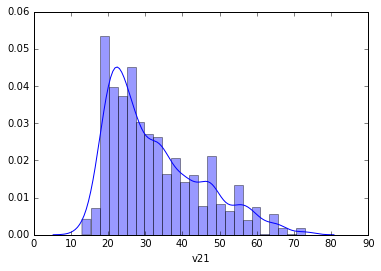

In [235]:
#fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(20, 5))
sns.distplot(train_df_1.v21)


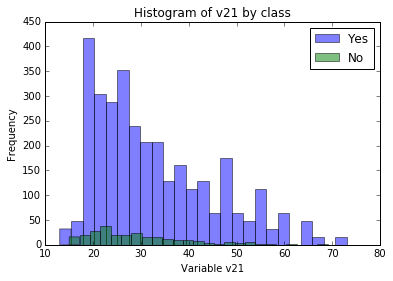

In [238]:
make_hist('v21',25)


* The distribution of variable "v21" is right skewed. Hence this variable needs transformation before fitting with any linear models.

#### Step 4.2 variable v22:

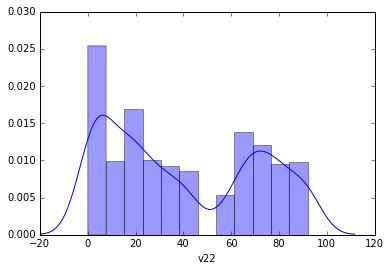

In [264]:
sns.distplot(train_df_1.v22);

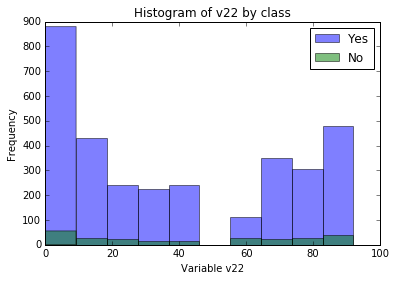

In [240]:
make_hist('v22',10)

* the Distribution of variable 'v22' is 'Bimodal', indiacting there are two separate groups involved.
* A flag variable should be created to differentiate between the two groups by the model.

#### Step 4.3 : Variable v31:

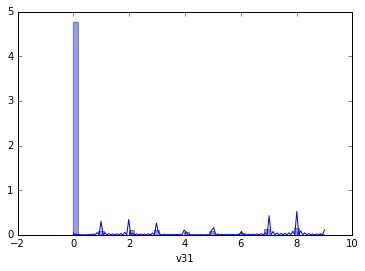

In [241]:
sns.distplot(train_df_1.v31); # More number of 0 values

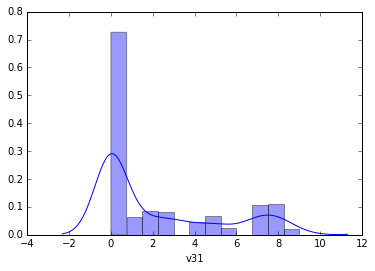

In [242]:
sns.distplot(train_df_1[train_df_1.v31!=0]['v31']); # after excluding 0

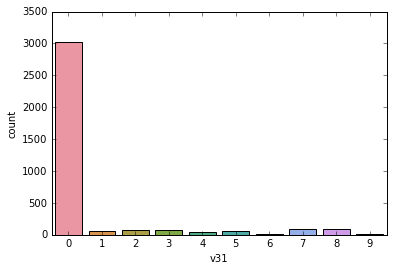

In [243]:
sns.countplot(train_df_1['v31'].astype(int)); # This should be then used as discrete numerical varaiable

* Variable 'v31' is a discrete variable
* Use as,it is in the model

#### Step 4.4 Varaiable : v81

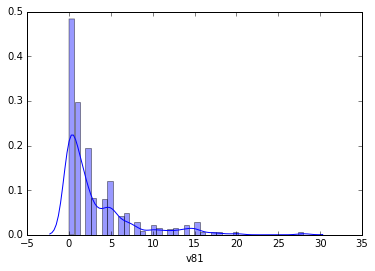

In [244]:
sns.distplot(train_df_1.v81); # More number of 0 values

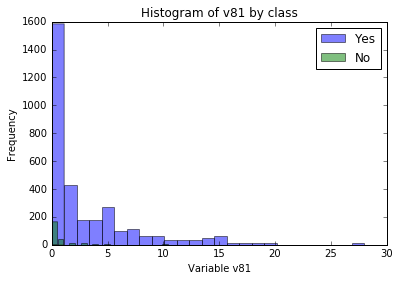

In [245]:
make_hist('v81',25)

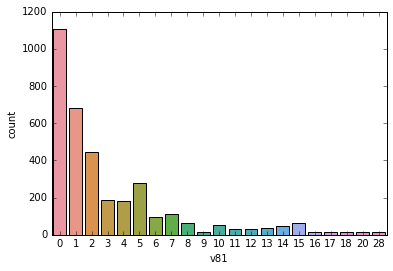

In [246]:
sns.countplot(train_df_1['v81'].astype(int));

#### Step 4.5 : variable V82

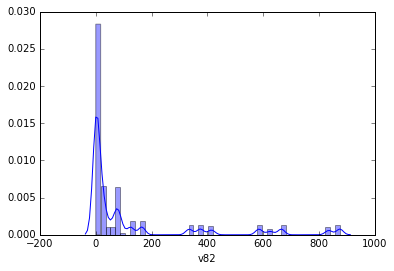

In [247]:
sns.distplot(train_df_1.v82);

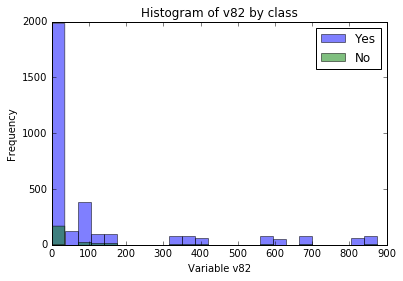

In [249]:
make_hist('v82',25)

0.0      858
5.0      680
25.0     296
75.0     220
4.0      191
85.0     143
165.0    113
125.0    113
375.0     85
585.0     84
665.0     83
875.0     83
335.0     83
29.0      74
415.0     71
835.0     65
46.0      65
625.0     50
54.0      49
21.0      36
71.0      32
17.0      16
96.0      16
58.0      16
Name: v82, dtype: int64


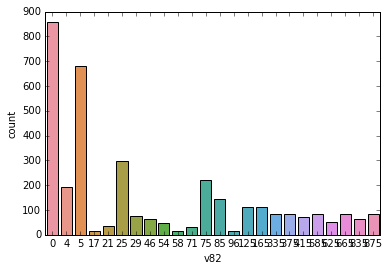

In [252]:
sns.countplot(train_df_1['v82'].astype(int));
print(train_df_1['v82'].value_counts())

#### Step 4.6 : Variable v14

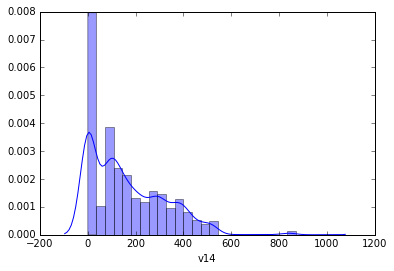

In [253]:
sns.distplot(train_df_1.v14);
## FiX mE ---Needs Outlier analysis

* The distribution is extremely right skewed and there are few outliers present.
* Handle these outliers before model building

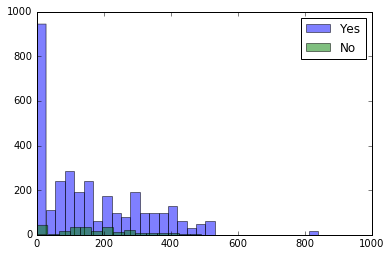

In [202]:
make_hist('v14',30)

#### Step 4.7 Variable v15:

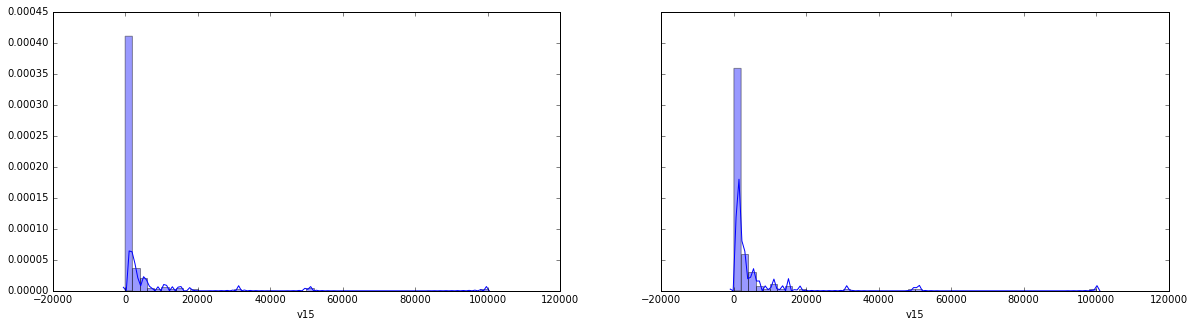

In [255]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(20, 5))
sns.distplot(train_df_1.v15, ax= ax1);
sns.distplot(train_df_1[train_df_1['v15']!=0]['v15'], ax = ax2)

##### More outliers or extremely right skewed

#### Step 4.8: Variable v11

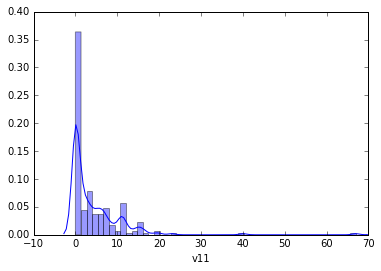

In [256]:
sns.distplot(train_df_1.v11);

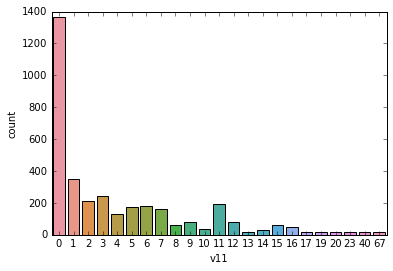

In [257]:
sns.countplot(train_df_1.v11);

In [147]:
def my_count_plot(var):
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    sns.countplot(x = var, data = train_df_1, color = 'c',ax = ax1);
    sns.countplot(x = var, hue = 'classLabel',data = train_df_1,  color = 'c',ax = ax2)


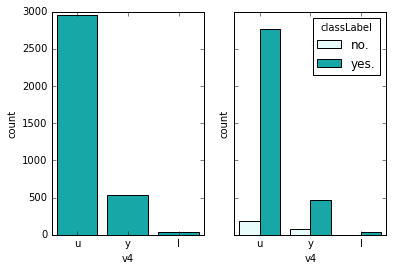

In [149]:
my_count_plot('v4')

* value 'u' is predominant,followed by 'y' and 'l'

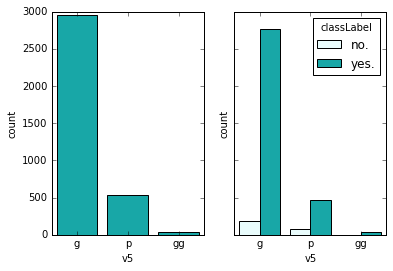

In [150]:
my_count_plot('v5')

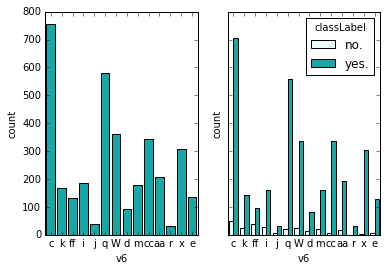

In [151]:
my_count_plot('v6')

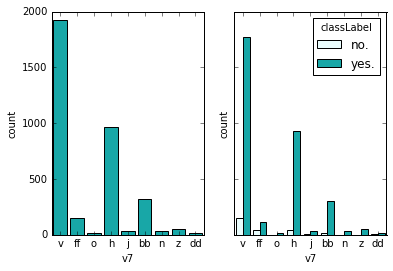

In [152]:
my_count_plot('v7')

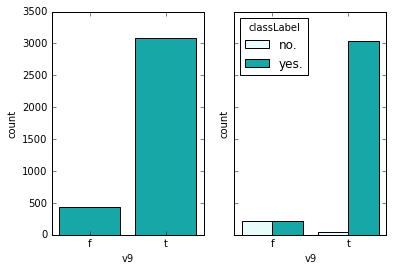

In [153]:
my_count_plot('v9')

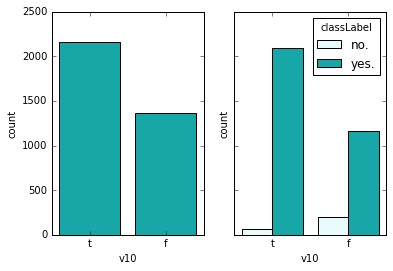

In [154]:
my_count_plot('v10')

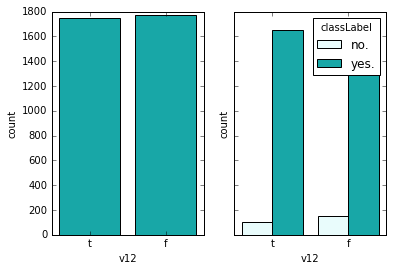

In [155]:
my_count_plot('v12')

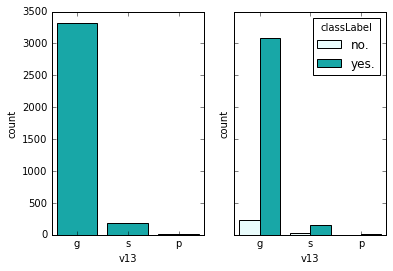

In [156]:
my_count_plot('v13')

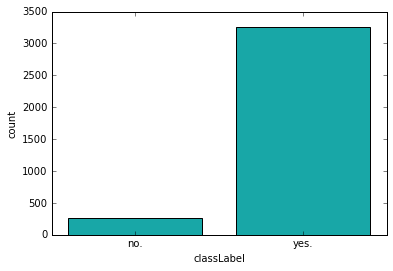

In [204]:
sns.countplot(x = 'classLabel', data = train_df_1, color = 'c');

In [287]:
train_df_1.classLabel.value_counts(normalize =1)

yes.    0.903851
no.     0.096149
Name: classLabel, dtype: float64

### Inferences from data Exploration:
* Some variables are right skewed ,which needs transformation before modelling
* Few variables have outliers , which should be treated.
* Few variables are duplicated , for instance v14 and v17.Include only one set of variables.
* 

### Step 5: Feature Engineering

In [9]:
# Step 5.1 Train set: 
# get the numeric cols
numeric_cols = train_df_1.select_dtypes(include = ['float64','int64']).columns
print(numeric_cols)

# Step 5.2:
# remove outliers
for col in numeric_cols:
    print(col)
    print(np.percentile(train_df_1[col],99.5))
    train_df_1 = train_df_1[(train_df_1[col] <= np.percentile(train_df_1[col],99.5))]
print(train_df_1.shape)    
                             

# Step 5.3:
# transformation of Numeric Variables
# v21
train_df_1['log_v21'] = np.log(train_df_1['v21']+1)
train_df_1['v22_flag'] = train_df_1['v22'].apply(lambda x: 1 if x < 50 else 0)
train_df_1['log_v82'] = np.log(train_df_1['v82']+1)
train_df_1['log_v14'] = np.log(train_df_1['v14']+1)
train_df_1['log_v15'] = np.log(train_df_1['v15']+1)



Index(['v11', 'v14', 'v15', 'v17', 'v19', 'classLabel', 'is_test', 'v21',
       'v22', 'v31', 'v32', 'v81', 'v82'],
      dtype='object')
v11
40.0
v14
740.8
v15
51100.0
v17
5200000.0
v19
1.0
classLabel
1.0
is_test
1.0
v21
69.0
v22
92.0
v31
8.0
v32
17978.0
v81
20.0
v82
875.0
(3581, 22)


In [407]:
train_df_1.shape

(3581, 27)

In [10]:

# Step 5.4: Feature Standardization
cols_to_keep = []
untrans_num_features = ['v81','v11']
untrans_cat_features = ['v4', 'v6', 'v7', 'v9', 'v10', 'v12', 'v13'] # 'v5' excluded since v5 = v4
trans_num_features =  ['log_v21','v22_flag', 'log_v82', 'log_v14','log_v15']
cols_to_keep.extend(untrans_num_features)
#cols_to_keep.extend(untrans_cat_features)
cols_to_keep.extend(trans_num_features)

train_df_1_dummy = pd.get_dummies(train_df_1[untrans_cat_features])
dummy_columns = train_df_1_dummy.columns
print([col for col in train_df_1.columns])
train_df_1 = pd.concat([train_df_1,train_df_1_dummy], axis = 1)
print([col for col in train_df_1.columns])

cols_to_keep.extend(dummy_columns)

train_df_2 = train_df_1[train_df_1['is_test']==0]
test_df_2 = train_df_1[train_df_1['is_test'] == 1]

train_x = train_df_2[cols_to_keep]
train_y = train_df_2['classLabel']


test_x = test_df_2[cols_to_keep]
test_y = test_df_2['classLabel']
#sc = StandardScaler()
#sc.fit(X_train)
#X_train_std  = sc.transform(X_train)
#X_test_std = sc.transform(X_test)

['v1', 'v4', 'v5', 'v6', 'v7', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v17', 'v19', 'classLabel', 'is_test', 'v21', 'v22', 'v31', 'v32', 'v81', 'v82', 'log_v21', 'v22_flag', 'log_v82', 'log_v14', 'log_v15']
['v1', 'v4', 'v5', 'v6', 'v7', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v17', 'v19', 'classLabel', 'is_test', 'v21', 'v22', 'v31', 'v32', 'v81', 'v82', 'log_v21', 'v22_flag', 'log_v82', 'log_v14', 'log_v15', 'v4_l', 'v4_u', 'v4_y', 'v6_W', 'v6_aa', 'v6_c', 'v6_cc', 'v6_d', 'v6_e', 'v6_ff', 'v6_i', 'v6_j', 'v6_k', 'v6_m', 'v6_q', 'v6_r', 'v6_x', 'v7_bb', 'v7_dd', 'v7_ff', 'v7_h', 'v7_j', 'v7_n', 'v7_o', 'v7_v', 'v7_z', 'v9_f', 'v9_t', 'v10_f', 'v10_t', 'v12_f', 'v12_t', 'v13_g', 'v13_p', 'v13_s']


In [382]:
type(test_y)

pandas.core.series.Series

### Step 6: Model Building

In [11]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(train_x, train_y)

predicted_scores_train = lr.predict_proba(train_x)
predicted_scores_test = lr.predict_proba(test_x)

#print(lr.classes_)
#print(lr.coef_)
#print(predicted_scores_train[:5])
#print(predicted_scores_train[:,1])
def predict_y(predicted_scores,threshold=0.5):
    ypred_label = predicted_scores.copy()   
    
    ypred_label[ypred_label > threshold] = 1
    ypred_label[ypred_label <= threshold] = 0
    return ypred_label

## Evaluation on train set
y_pred_train = predict_y(predicted_scores_train)
#print('Predicted Labels Train',y_pred_train[:5])
print("\nTraining..........\n", pd.crosstab(train_y,y_pred_train[:,1]))

## Evaluation on test set at 0.5 threshold
y_pred_test = predict_y(predicted_scores_test)
print("\nTesting...........\n", pd.crosstab(test_y,y_pred_test[:,1]))



Training..........
 col_0        0.0  1.0
classLabel           
0           3120   32
1             83  166

Testing...........
 col_0       0.0  1.0
classLabel          
0            84    2
1            52   42


In [12]:
print('Training accuracy:', lr.score(train_x, train_y))
print('Test accuracy:', lr.score(test_x, test_y))


Training accuracy: 0.96618641576
Test accuracy: 0.7


### Step 7 : Model Evaluation 
* **Choosing a threshold of 0.5, is not an appropriate value for real-world classification problem.**
* **Choice of threshold depends on mis-classification cost involved, and this misclassification cost varies between industries.**
* ** Assuming the current industry as Ad-tech industry, and the data represents the features of an ad, and the class label indicating whether, the add has been clicked or not.**
* ** I have swaped the "yes" and "no". Since the dataset has very low proportion of "no".Our actual positive examples are "no".Hence I'm encoding "no" as "1", and "yes" as "0".**
* ** Hence "1" indicates "displayed ad being clicked upon", and "0" indicates "displayed ad not being clicked".**
* ** Displaying a single ad invloves some cost spending, "Ads being clicked gains some revenue".Hence our objective would be to build a model ,that accurately predicts how many of the diaplayed ads will be clicked.**
* ** Hence , Precision should be our decision metric. choose a threshold to maximise the precision **.






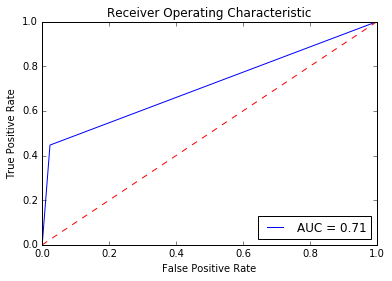

In [445]:
# precision, Recall, Accuracy, f1-score
from sklearn.metrics import roc_auc_score,confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

fpr, tpr, threshold = roc_curve(test_y, y_pred_test[:,1])
roc_auc = auc(fpr, tpr)
# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

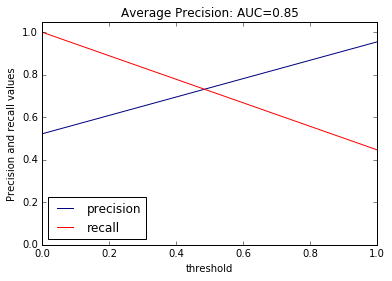

In [415]:
precision, recall, thresholds = precision_recall_curve(test_y, y_pred_test[:,1])
average_precision = average_precision_score(test_y, y_pred_test[:,1])

precision = np.delete(precision, len(precision)-1)
recall = np.delete(recall, len(recall)-1)

plt.clf()
plt.plot(thresholds, precision, color='navy', label='Precision-Recall curve')
plt.plot(thresholds, recall, color='red', label='Precision-Recall curve')
plt.xlabel('threshold')
plt.ylabel('Precision and recall values')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average Precision: AUC={0:0.2f}'.format(average_precision))
plt.legend(['precision','recall'],loc="lower left")
plt.show()

* **Inorder to get the precision of 80% , set the theshold of 0.7**

In [446]:
y_pred_test = predict_y(predicted_scores_test,0.7)
print("\nTesting at 0.7 \n", pd.crosstab(test_y,y_pred_test[:,1]))

print('\nPrecision at threshold of 0.7: ', round(32/33,2))


Testing at 0.7 
 col_0       0.0  1.0
classLabel          
0            85    1
1            62   32

Precision at threshold of 0.7:  0.97


### Step 8: Conclusion

* This model performs better prediction task at 0.7 threshold.
* we were able to achieve 97% precision.
* save the model equation inorder to be productionized as a  microservice

In [13]:
print(lr.coef_)

[[-0.12364427 -0.44707334 -0.02880123 -0.59649044 -0.04179049 -0.10287363
  -0.07576672 -2.88117213  1.31543071  1.70077205 -1.60257944  0.02736684
  -1.58752721 -2.8153711  -1.71313054 -0.89126972  4.13685945  0.95225658
   6.20145498  0.66050921 -0.41001264 -0.96044694  1.48974926 -3.3528281
  -1.55966662  1.89723132 -0.69648821  1.558412   -4.17037303 -2.12000467
   3.56115987  1.23003329  0.43472668  2.39340917 -2.25837854 -0.69496091
   0.82999154  0.21300996 -0.07797933 -1.8654377   2.75859369 -0.75812536]]


In [14]:
print(lr.intercept_)

[ 0.13503063]


In [15]:
train_x.columns


Index(['v81', 'v11', 'log_v21', 'v22_flag', 'log_v82', 'log_v14', 'log_v15',
       'v4_l', 'v4_u', 'v4_y', 'v6_W', 'v6_aa', 'v6_c', 'v6_cc', 'v6_d',
       'v6_e', 'v6_ff', 'v6_i', 'v6_j', 'v6_k', 'v6_m', 'v6_q', 'v6_r', 'v6_x',
       'v7_bb', 'v7_dd', 'v7_ff', 'v7_h', 'v7_j', 'v7_n', 'v7_o', 'v7_v',
       'v7_z', 'v9_f', 'v9_t', 'v10_f', 'v10_t', 'v12_f', 'v12_t', 'v13_g',
       'v13_p', 'v13_s'],
      dtype='object')

In [19]:
pd.DataFrame({"Varaiable":train_x.columns.values, "coeff":lr.coef_[0]}).to_csv('D:/PROJECTS/pubnative/logit_equation.csv')